In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

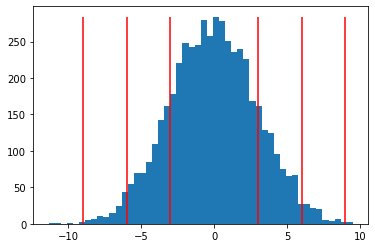

In [3]:
N=5000
sigma =3
obs = np.random.normal(scale=sigma, size=N)
bins = plt.hist(obs, bins=N//100)
plt.vlines([k*sigma for k in range(-3,4) if k!=0], 0, max(bins[0]), color='r')


## 2

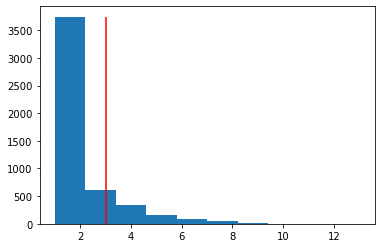

In [4]:
obs = np.random.geometric(p=0.5, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [5]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_)}% of the interval') 

All observations are contained in the [0, 13] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 23.0% of the interval


## 3

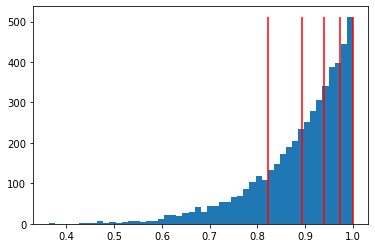

In [6]:
obs = np.random.power(a=8, size=N)
quantiles = [np.quantile(obs, i/5) for i in range(1,6)]
bins = plt.hist(obs, bins=N//100)
plt.vlines(quantiles, 0, max(bins[0]), color='red')

We can see (1st line) that 20% of the data is contained in [0, 0.8] interval

## 4

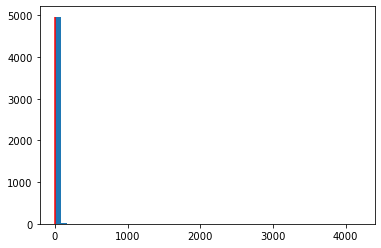

In [7]:
obs = np.random.zipf(a=2, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs, bins=N//100)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [8]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_, 5)}% of the interval') 

All observations are contained in the [0, 4188] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 0.07163% of the interval


## 5

In [9]:
import networkx as nx

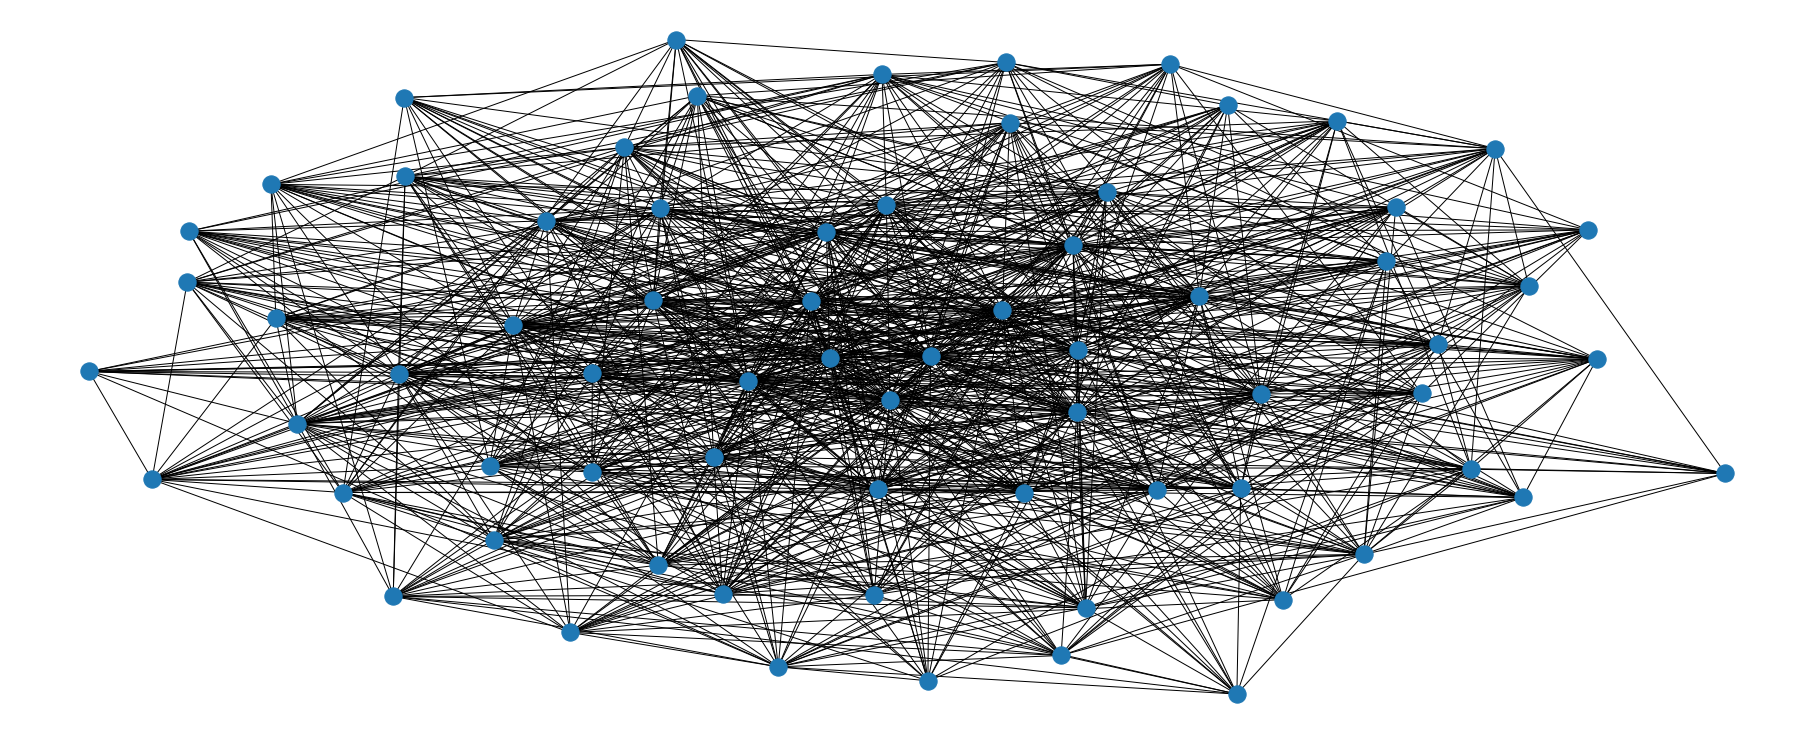

In [10]:
ba = nx.generators.random_graphs.barabasi_albert_graph(70, 20)
plt.figure(figsize=(25,10))
nx.draw_kamada_kawai(ba)

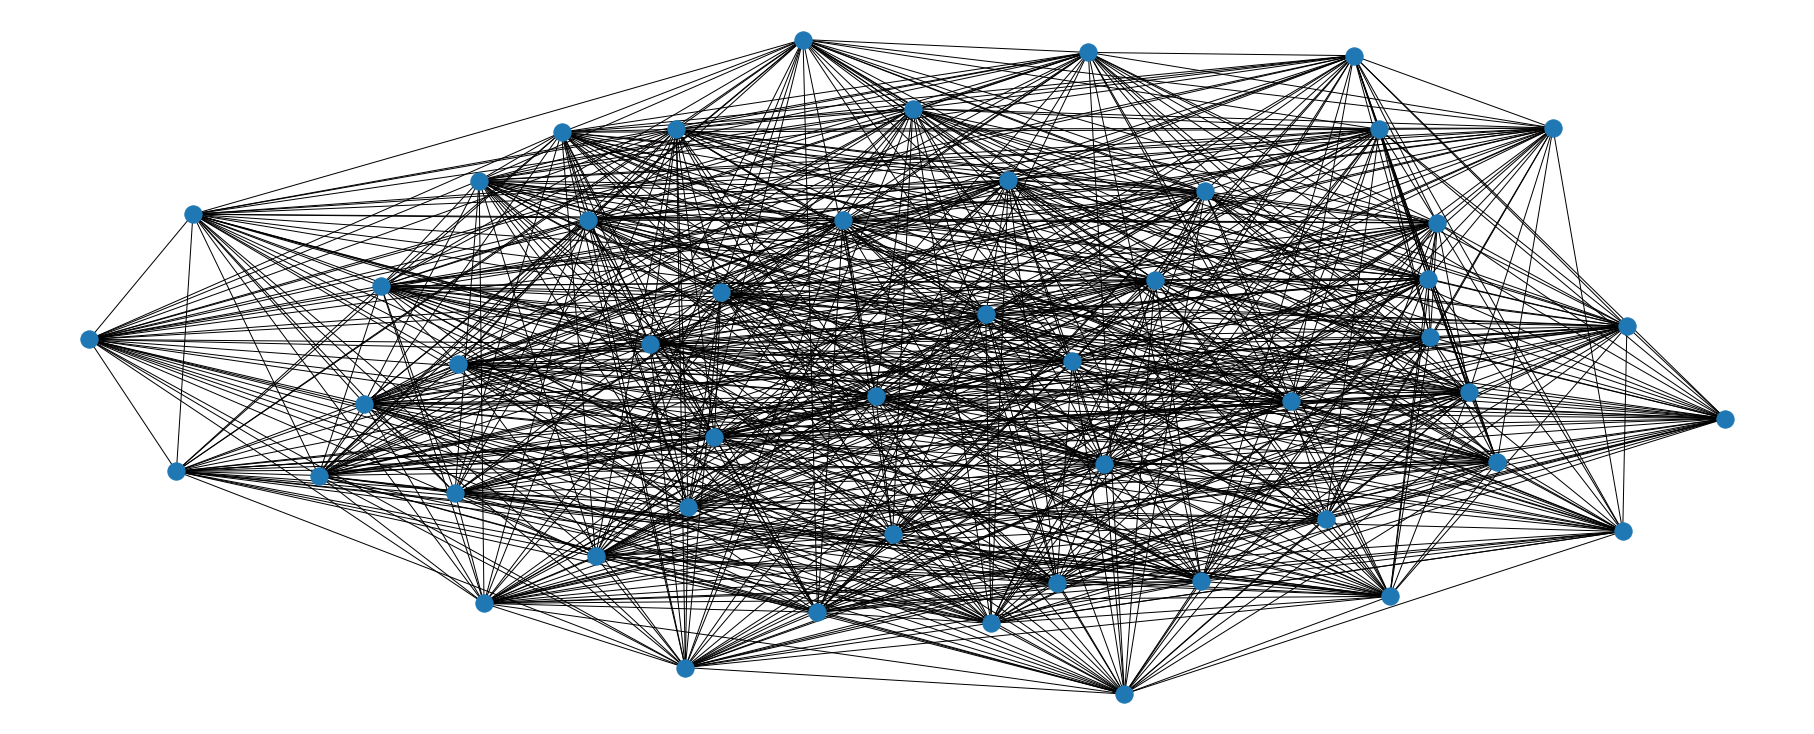

In [11]:
er = nx.generators.random_graphs.erdos_renyi_graph(50, 0.7)
plt.figure(figsize=(25,10))
nx.draw(er)

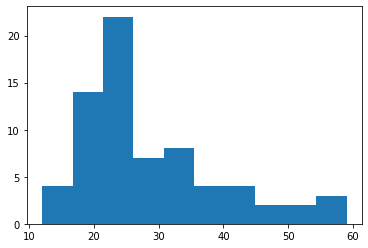

In [12]:
def draw_degree_hist(G: nx.Graph) -> None:
    degrees = dict(ba.degree).values()
    plt.hist(degrees)
draw_degree_hist(ba)

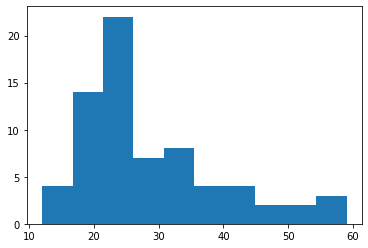

In [13]:
draw_degree_hist(er)

In [14]:
from collections import Counter
def get_mean(G: nx.Graph) -> float:
    counts = dict(Counter(dict(G.degree).values()))
    n_vertex = len(G.nodes)
    ex = np.sum([k*v for k, v in counts.items()])/n_vertex
    return ex
def get_variance(G: nx.Graph) -> float:
    counts = dict(Counter(dict(G.degree).values()))
    n_vertex = len(G.nodes)
    ex = np.sum([k*v for k, v in counts.items()])/n_vertex
    ex2 = np.sum([(k**2)*v for k, v in counts.items()])/n_vertex
    return ex2 - ex**2

for g in [er, ba]:
    print(f'Mean: {get_mean(g)}, variance: {get_variance(g)}')

Mean: 34.12, variance: 7.425600000000031
Mean: 28.571428571428573, variance: 114.9591836734694


# 6.1

In [15]:
G = nx.generators.random_graphs.barabasi_albert_graph(15, 5)

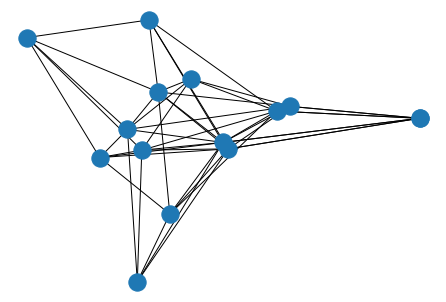

In [16]:
nx.draw_spectral(G)

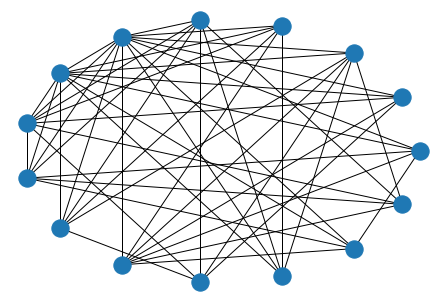

In [17]:
nx.draw_circular(G)

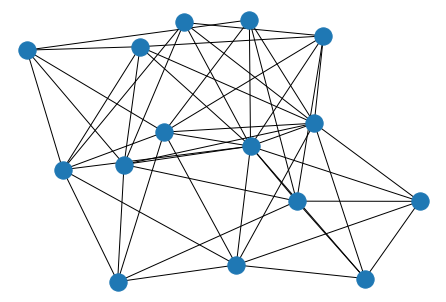

In [18]:
nx.draw_kamada_kawai(G)

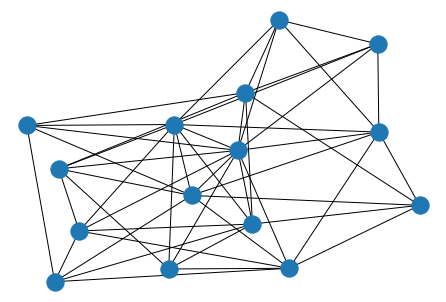

In [19]:
nx.draw_spring(G)

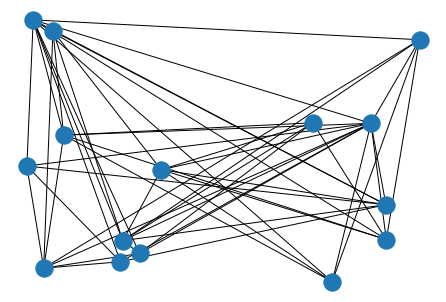

In [20]:
nx.draw_random(G)

## 6.3

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


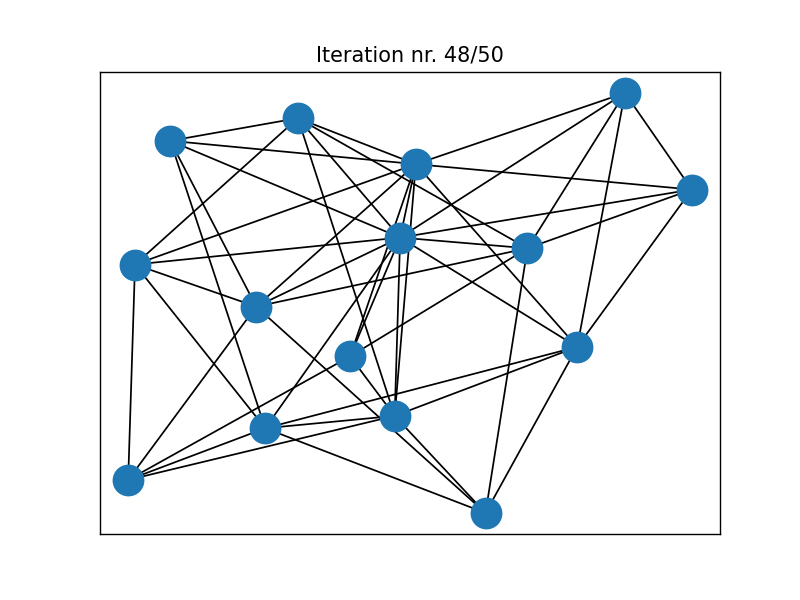

In [22]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False)

def init():
    nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False, ax=ax)
    return ax
    

def update(frame):
    ax.clear()
    nx.draw_networkx(G, nx.spring_layout(G, iterations=round(frame), seed=42), with_labels=False, ax=ax)
    ax.set_title(f"Iteration nr. {round(frame)}/50")
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, 50), interval=100, init_func=init)